# Deep Python 2024

Автор: Жемуков Альберт Артурович

Cтудент БПМИ 239

## Предисловие

После самостоятельного изучения библиотеки, ее документации и гайдов по ней, я создал этот доклад. Вместо исключительного объяснения как работает каждый метод, я постарался показать это преимущественно на примерах (которые постарался сделать достаточно интересными). То есть, доклад это своего рода выжимка != документация. Он создан именно с целью потыкать код и при этом понять, что происходит. Другими словами, фундаментальные объяснения, которые есть в документации здесь вряд ли будут. Доклад построен на практических примерах.

With that out of the way, погнали дальше!

![chillguy](images/justachillguy-v0-cnvsm1t7p82e1.png.webp)

## Dask

![logo](images/images.png)

Dask - это библиотека для параллельных вычислений и масштабирования. Допустим, что Numpy не справляется с объемом данных, который нам нужно будет обработать. В таком случае естественной альтернативой как раз станет Dask. Dask предоставляет возможность работать с данными, которые превышают объем оперативной памяти, и эффективно использовать ресурсы как на локальной машине, так и на кластере. Библиотека позволяет масштабировать код Python с минимальными изменениями.

## Немного теории

Кластер — это группа компьютеров, объединённых вместе для совместного выполнения задач. Они работают как единая система и часто используются для увеличения производительности, масштабируемости и надежности.

Кластер работает благодаря взаимодействию нескольких компонентов. Контроллер (мастер-узел) отвечает за управление распределением задач между узлами, отслеживает их состояние и следит за использованием ресурсов, таких как память и процессоры. Рабочие узлы (worker-узлы) выполняют задачи, которые им передает контроллер, обрабатывают данные или производят вычисления. Все узлы в кластере связаны между собой через локальную или облачную сеть, что позволяет им обмениваться данными и координировать выполнение задач в реальном времени.

Dask поддерживает работу на локальном компьютере, но его ключевая сила — распределенные вычисления на кластерах.

Кластеры — это основа современных вычислений, особенно в сфере анализа данных, машинного обучения и высокопроизводительных вычислений.

## Полезные ссылки

[Официальная документация либы](https://docs.dask.org/en/stable/)

[Официальный туториал](https://tutorial.dask.org/00_overview.html)

[Офигенная статья на Хабре](https://habr.com/ru/companies/otus/articles/759552/)

## Установка

Здесь все стандартно:

In [34]:
%pip install "dask[complete]"


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Dask Array

Dask Array — это масштабируемая версия массива NumPy, которая работает с массивами, превышающими объем оперативной памяти, и распределяет вычисления между несколькими ядрами или машинами.

- Dask Array поддерживает API NumPy, что позволяет использовать знакомые функции и методы.

- Массивы разбиваются на более мелкие блоки, которые обрабатываются независимо.

- Поддерживаются вычисления как на локальной машине, так и в распределенных системах.

Рассмотрим для начала пример:

In [35]:
import numpy as np
import dask.array as da

# Создаем обычный NumPy массив размером 10x10
x = np.arange(100).reshape(10, 10)
# Преобразуем NumPy массив в Dask Array с чанками (разбиением) 5x5
dask_array = da.from_array(x, chunks=(5, 5))

result = dask_array.mean()
print(result.compute())

49.5


Разберемся, что здесь вообще происходит.

Вместо того чтобы обрабатывать весь массив сразу, Dask делит его на чанки, что позволяет работать с большими данными, превышающими оперативную память.
Выполнение вычислений параллелизуется, что ускоряет процесс на многопроцессорных системах.

![dask-array](images/dask-array-2.png)

На изображении показано, как Dask Array разбивает большой массив на более мелкие части — чанки. Каждый чанк представляет собой отдельный NumPy массив.

Пусть нам нужно вычислить индекс растительности NDVI для спутниковых данных, представляющих 10 сцен, каждая из которых состоит из двух каналов: ближний инфракрасный (NIR) и красный (Red). NDVI является важным показателем для анализа растительности, так как он показывает степень активности фотосинтеза в растительных покровах.

In [36]:
# Генерируем массив данных: снимки 10000x10000 (10 сцен, 2 канала: NIR и Red)
satellite_data = da.random.random((10, 2, 10_000, 10_000), chunks=(1, 2, 5000, 5000))

# Разделяем каналы
nir = satellite_data[:, 0, :, :]  # Near Infrared
red = satellite_data[:, 1, :, :]  # Red

# Вычисляем NDVI
ndvi = (nir - red) / (nir + red)

print("NDVI сцены 1, пиксель [0, 0]:", ndvi[0, 0, 0].compute())

NDVI сцены 1, пиксель [0, 0]: 0.5443323436090595


Попробуем сделать то же самое с NumPy (этот код ниже лучше не запускать)

In [37]:
# Генерируем аналогичный массив данных: снимки 10000x10000 (10 сцен, 2 канала)

# numpy_satellite_data = np.random.random((10, 2, 10_000, 10_000))

# Разделяем каналы
# nir = numpy_satellite_data[:, 0, :, :]  # Near Infrared
# red = numpy_satellite_data[:, 1, :, :]  # Red

# Вычисляем NDVI
# try:
    # ndvi = (nir - red) / (nir + red)
    # print("NDVI сцены 1, пиксель [0, 0]:", ndvi[0, 0, 0])
# except MemoryError:
    # print("NumPy не справился: данные слишком велики для оперативной памяти.")

Таким образом, мы посмотрели как работают массивы в Dask. Теперь потыкаем Bag

## Dask Bag

Dask Bag — это компонент библиотеки Dask, предназначенный для параллельной обработки коллекций произвольных Python объектов с использованием операций, таких как map, filter, fold и groupby. Он эффективно работает с неструктурированными или полуструктурированными данными, такими как текстовые файлы, лог-файлы, JSON-записи или пользовательские объекты Python.

Рассмотрим задачу подсчета наиболее частых слов в наборе текстовых файлов (например, анализ лог-файлов).

In [38]:
import random
import string
from datetime import datetime
from dask.distributed import Client
import dask.bag as db

# Запуск Dask Dashboard
client = Client()
print(client.dashboard_link)

# Функция для генерации случайной строки логов
def generate_log_line():
    ip = ".".join(str(random.randint(0, 255)) for _ in range(4))  # Генерация случайного IP-адреса
    timestamp = datetime.now().strftime('%d/%b/%Y:%H:%M:%S')  # Текущее время в формате логов
    http_methods = ["GET", "POST", "PUT", "DELETE", "PATCH"]
    method = random.choice(http_methods)  # Случайный HTTP-метод
    url = "/" + "/".join(
        ''.join(random.choices(string.ascii_lowercase, k=random.randint(3, 10))) for _ in range(3)
    )  # Случайный URL
    status = random.choice([200, 201, 400, 404, 500])  # Случайный статус ответа
    response_time = random.uniform(0.1, 5.0)  # Время ответа в секундах

    return f'{ip} - - [{timestamp}] "{method} {url} HTTP/1.1" {status} {int(response_time * 1000)}'

# Обработка строк логов: выделение частей лога для анализа
def process_log_line(line):
    parts = line.split()
    if len(parts) < 9:  # Проверка на валидность строки лога
        return []
    ip = parts[0]  # IP-адрес
    method = parts[5].strip('"')  # HTTP-метод
    status = parts[8]  # Статус ответа
    return [ip, method, status]

# Генерация 1 миллиона строк логов с ленивым генератором
num_lines = 1 * 10 ** 6
chunk_size = 1 * 10 ** 5
data = db.from_sequence((generate_log_line() for _ in range(num_lines)), npartitions=num_lines // chunk_size)

# Обработка логов
processed_data = data.map(process_log_line).flatten()  # Обрабатываем строки логов

# Подсчитываем частоту каждого элемента
element_counts = processed_data.frequencies()

# Получаем топ-10 самых частых элементов
top_10_elements = element_counts.topk(10, key=lambda x: x[1])
print("Топ-10 самых частых элементов:", top_10_elements.compute())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53400 instead
  warnings.warn(


http://127.0.0.1:53400/status


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/distributed/client.py:3371: UserWarning: Sending large graph of size 87.57 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Топ-10 самых частых элементов: [('305', 255), ('1708', 254), ('2295', 254), ('2925', 247), ('3601', 247), ('2532', 246), ('1316', 246), ('1197', 246), ('2359', 246), ('3573', 246)]


Dask Bag напоминает параллельную версию библиотеки PyToolz или Python-эквивалент RDD из Apache Spark. Благодаря ленивой обработке и использованию итераторов, Dask Bag позволяет работать с данными, превышающими объем оперативной памяти, и эффективно задействовать ресурсы нескольких ядер или даже машин.

## Прогресс выполнения

Dask поддерживает визуализацию выполнения задач через инструмент Dask Dashboard. Вы можете запустить его, добавив следующие строки:

In [39]:
# from dask.distributed import Client
# client = Client()
print(client.dashboard_link)  # Откроет ссылку на дашборд

http://127.0.0.1:53400/status


После запуска вы сможете видеть статус выполнения задач в режиме реального времени.

## Dask DataFrame

Dask DataFrame — это инструмент для работы с большими табличными данными, который позволяет масштабировать вычисления на основе библиотеки pandas. Если данные слишком велики для обработки в памяти или вычисления занимают слишком много времени, Dask DataFrame предоставляет решение, которое позволяет эффективно использовать ресурсы компьютера или распределенного кластера.

API Dask DataFrame почти полностью повторяет API pandas. Большинство методов pandas можно использовать с Dask.

In [40]:
import pandas as pd
import dask.dataframe as dd

# Создаем pandas DataFrame
data = pd.DataFrame({'a': range(100), 'b': range(100, 200)})

# Преобразуем pandas DataFrame в Dask DataFrame
dask_df = dd.from_pandas(data, npartitions=4)
print(dask_df.head())  # Вывод первых строк

   a    b
0  0  100
1  1  101
2  2  102
3  3  103
4  4  104


In [41]:
import os
import pandas as pd
import dask.dataframe as dd

# Создаем тестовые данные
def create_mock_data(file_type, directory="data", num_files=3):
    os.makedirs(directory, exist_ok=True)
    for i in range(num_files):
        data = pd.DataFrame({
            "col1": range(10 * i, 10 * (i + 1)),
            "col2": [f"text_{j}" for j in range(10)],
        })
        file_path = os.path.join(directory, f"file_{i}.{file_type}")
        if file_type == "csv":
            data.to_csv(file_path, index=False)
        elif file_type == "parquet":
            data.to_parquet(file_path, index=False)
        elif file_type == "json":
            data.to_json(file_path, orient="records", lines=True)
    print(f"{num_files} {file_type.upper()} files created in '{directory}/'")

# Чтение mock-файлов с помощью Dask
def read_mock_files(file_type, directory="data"):
    if file_type == "csv":
        df = dd.read_csv(f"{directory}/*.csv")
    elif file_type == "parquet":
        df = dd.read_parquet(f"{directory}/*.parquet")
    elif file_type == "json":
        df = dd.read_json(f"{directory}/*.json")
    else:
        raise ValueError("Unsupported file type")
    
    print("Пример данных:")
    print(df.head())
    print("-"*40)

# Создаем mock CSV, Parquet и JSON файлы
create_mock_data("csv")
create_mock_data("parquet")
create_mock_data("json")

# Читаем файлы и выводим пример данных
read_mock_files("csv")
read_mock_files("parquet")
read_mock_files("json")

3 CSV files created in 'data/'
3 PARQUET files created in 'data/'
3 JSON files created in 'data/'
Пример данных:
   col1    col2
0     0  text_0
1     1  text_1
2     2  text_2
3     3  text_3
4     4  text_4
----------------------------------------
Пример данных:
   col1    col2
0     0  text_0
1     1  text_1
2     2  text_2
3     3  text_3
4     4  text_4
----------------------------------------
Пример данных:
   col1    col2
0     0  text_0
1     1  text_1
2     2  text_2
3     3  text_3
4     4  text_4
----------------------------------------


In [42]:
df = dd.read_json('data/*.json')

print(df.head()) # Первые строки
print(df.info()) # Информация о DataFrame
print(df.describe()) # Статистика

   col1    col2
0     0  text_0
1     1  text_1
2     2  text_2
3     3  text_3
4     4  text_4
<class 'dask_expr.DataFrame'>
Columns: 2 entries, col1 to col2
dtypes: int64(1), string(1)None
Dask DataFrame Structure:
                  col1
npartitions=1         
               float64
                   ...
Dask Name: to_frame, 6 expressions
Expr=ToFrame(frame=ArrowStringConversion(frame=FromDelayed(207633f))['col1'].describenumeric(split_every=False))


Если данные часто используются, их можно сохранить в оперативной памяти

In [43]:
persisted_df = df.persist()

Dask поддерживает запись данных в различные форматы

In [44]:
# Запись в CSV
df.to_csv('output/*.csv', index=False)

# Запись в Parquet
df.to_parquet('output/', engine='pyarrow') # директория output в репозитории должна обновиться

## Dask Delayed

Dask Delayed — это инструмент для параллельного выполнения пользовательских алгоритмов, которые не вписываются в стандартные высокоуровневые коллекции Dask, такие как Array, DataFrame или Bag. С помощью Dask Delayed можно создавать графы задач (task graphs), описывающие порядок выполнения функций, и выполнять их параллельно. Этот подход особенно полезен для вычислений, где присутствует явный параллелизм, но нет структуры данных, подходящей для стандартных коллекций Dask.

Вместо немедленного выполнения функции, Dask Delayed откладывает её выполнение и строит граф задач. Граф содержит функции, их аргументы и зависимости между ними. После построения графа задачи могут быть выполнены параллельно с использованием планировщиков Dask.

In [45]:
from dask import delayed

def inc(x):
    return x + 1

def add(x, y):
    return x + y

x = delayed(inc)(1) # отложим выполнение на 1
y = delayed(inc)(2) # отложим выполнение  на 2
z = delayed(add)(x, y) # объект Delayed, содержащий граф задач
print(z.compute())

5


Для упрощения кода dask.delayed часто также используется как декоратор:

In [46]:
@delayed
def triple(x):
    return x * 3

Если задача зависит от побочного эффекта другой задачи, используется dask.graph_manipulation.bind:

In [47]:
from dask.graph_manipulation import bind

DATA = []

@delayed
def add_data(x):
    DATA.append(x)

@delayed
def sum_data(x):
    return sum(DATA) + x

a = add_data(1)
b = add_data(2)
c = bind(sum_data, [a, b])(3)
print(c.compute())

3


Рассмотрим сценарий, где необходимо выполнить сложную цепочку вычислений над несколькими наборами данных, включающую загрузку данных из нескольких источников, их предварительную обработку, выполнение вычислений и сохранение результатов. Еще добавим зависимости, которые требуют выполнения задач в определенном порядке.

In [48]:
import time

# Имитация загрузки данных
@delayed
def load_data(source):
    time.sleep(random.uniform(0.5, 1.5))  # Имитация задержки
    print(f"Загружаем данные из {source}")
    return [random.randint(1, 100) for _ in range(10)]  # Генерация данных

# Обработка данных: фильтрация
@delayed
def filter_data(data, threshold):
    print(f"Фильтруем данные с порогом {threshold}")
    return [x for x in data if x > threshold]

# Сложные вычисления: увеличение, затем умножение
@delayed
def computation(data):
    print("Выполняем вычисления")
    time.sleep(1)  # Имитация тяжелых вычислений
    return [x * 2 + 1 for x in data]

# Финальная агрегация
@delayed
def aggregate(data1, data2):
    print("Агрегация данных")
    return sum(data1) + sum(data2)

# Сохранение результата
@delayed
def save_result(result, filename):
    print(f"Сохраняем результат в {filename}")
    with open(filename, "w") as f:
        f.write(str(result))
    return f"Результат сохранен в {filename}"

# Создание графа задач
sources = ["source_1", "source_2"]

# Загрузка данных
data_1 = load_data(sources[0])
data_2 = load_data(sources[1])

# Обработка данных
filtered_data_1 = filter_data(data_1, threshold=50)
filtered_data_2 = filter_data(data_2, threshold=50)

# Сложные вычисления
computed_data_1 = computation(filtered_data_1)
computed_data_2 = computation(filtered_data_2)

# Агрегация данных
final_result = aggregate(computed_data_1, computed_data_2)

# Сохранение результатов
save_task = save_result(final_result, "examples/result.txt")

# Выполнение графа задач
save_task.compute()

Загружаем данные из source_2
Фильтруем данные с порогом 50
Выполняем вычисления
Загружаем данные из source_1
Фильтруем данные с порогом 50
Выполняем вычисления
Агрегация данных
Сохраняем результат в examples/result.txt


'Результат сохранен в examples/result.txt'

Добавим визуализацию

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


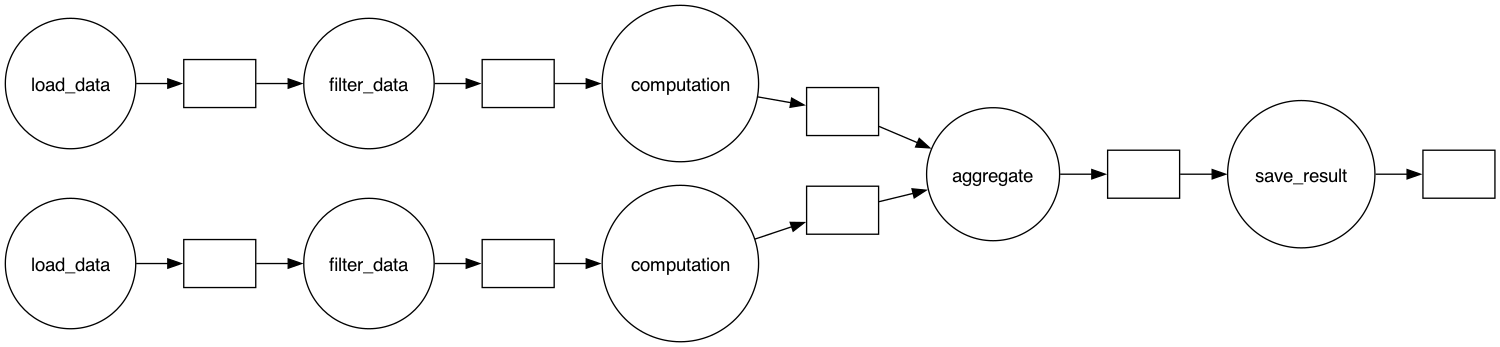

In [49]:
%pip install graphviz
save_task.visualize(rankdir="LR")

По умолчанию Dask Delayed использует многопоточный планировщик (threaded scheduler) для минимизации затрат на передачу данных. Однако, если ваш код сильно зависит от GIL, например, при выполнении вычислений, доминирующих в чистом Python, или при использовании внешнего кода, который удерживает GIL, рекомендуется использовать другие планировщики.

## Dask Futures

Dask Futures — это интерфейс для управления и выполнения задач в реальном времени, который позволяет легко масштабировать Python-код на кластере.

In [50]:
from dask.distributed import Client

client = Client()

def square(x):
    return x ** 2

future = client.submit(square, 10)  # отправляем задачу
print(future.result())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53551 instead
  warnings.warn(


100


Dask Futures позволяет создавать задачи в реальном времени, даже в процессе выполнения других задач. Это может быть полезно, если объем работы неизвестен заранее.

In [51]:
futures = [client.submit(square, i) for i in range(10)]
results = client.gather(futures)
print(results)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Dask Futures позволяет задавать зависимости между задачами вручную, обеспечивая выполнение задач в правильном порядке.

In [52]:
def add(x, y):
    return x + y

a = client.submit(square, 2)
b = client.submit(square, 3)
c = client.submit(add, a, b)
print(c.result())

13


Можно использовать методы map и gather для более эффективного управления несколькими задачами:

1. clientmap применяет функцию к набору аргументов
2. client.gather собирает результаты задач

In [53]:
futures = client.map(square, range(10))
results = client.gather(futures)
print(results)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Futures можно использовать совместно с коллекциями Dask, чтобы смешивать статические и динамические вычисления.

In [54]:
import dask.dataframe as dd
from dask.distributed import Client

client = Client()

# тение данных с помощью Dask DataFrame
ddf = dd.read_csv("data/*.csv")
print("Предварительный просмотр данных:")
print(ddf.head())

filtered_ddf = ddf[ddf["col1"] % 2 == 0]  # Фильтруем четные значения

# Динамические вычисления с Dask Futures
def compute_metric(partition):
    # Вычисляем сумму значений в партии
    return partition["col1"].sum()

# Преобразуем каждую партицию в Future с использованием клиента
delayed_partitions = filtered_ddf.to_delayed()
futures = [client.submit(compute_metric, part.compute()) for part in delayed_partitions]

# Собираем результаты из Futures
results = client.gather(futures)

# Итоговая сумма значений
total_sum = sum(results)
print(f"Сумма значений после фильтрации: {total_sum}")

client.close()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53590 instead
  warnings.warn(


Предварительный просмотр данных:
   col1    col2
0     0  text_0
1     1  text_1
2     2  text_2
3     3  text_3
4     4  text_4
Сумма значений после фильтрации: 210


## Dask ML

Dask предоставляет инструменты для масштабирования задач машинного обучения, позволяя работать с большими данными, распределять вычисления и эффективно использовать ресурсы кластера. Dask интегрируется с популярными библиотеками, такими как Scikit-learn, XGBoost, LightGBM, и поддерживает динамическое управление задачами с помощью интерфейса Futures.

Dask интегрируется с Optuna для распределенной оптимизации гиперпараметров. Это позволяет запускать большое количество экспериментов параллельно, синхронизируя результаты через планировщик Dask.

In [56]:
%pip install optuna dask[complete] scikit-learn
%pip install optuna

import optuna
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from dask.distributed import LocalCluster, Client, wait
import numpy as np

# Настройка Dask-кластера
cluster = LocalCluster()
client = Client(cluster)

# Загрузка более сложного датасета
X, y = make_classification(
    n_samples=1000,  # Увеличенное число выборок
    n_features=20,   # Увеличенное число признаков
    n_informative=15,  # Число информативных признаков
    n_redundant=5,   # Число избыточных признаков
    random_state=42
)

# Деление данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Добавление шума в данные для повышения сложности
X_train += np.random.normal(0, 0.1, X_train.shape)
X_test += np.random.normal(0, 0.1, X_test.shape)

# Функция для оценки модели
def evaluate_model(model, test_data):
    X_test, y_test = test_data
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred, average='weighted')  # Используем F1-меру

# Функция для оптимизации
def objective(trial):
    # Гиперпараметры для RandomForestClassifier
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),  # Расширенный диапазон
        "max_depth": trial.suggest_int("max_depth", 5, 20),          # Увеличенная глубина
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 15),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
    }
    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    score = evaluate_model(model, (X_test, y_test))
    print(f"Параметры: {params}, Результат: {score}")
    return score

# Создаем исследование Optuna
study = optuna.create_study(direction="maximize")

# Параллельная оптимизация с использованием Dask
def distributed_optimize():
    trials = [study.ask() for _ in range(10)]  # Генерируем 10 испытаний
    futures = [client.submit(objective, trial) for trial in trials]
    wait(futures)  # Ожидание завершения всех задач

    # Обработка результатов
    for trial, future in zip(trials, futures):
        try:
            result = future.result()  # Получаем результат из Dask Future
            study.tell(trial, result)  # Регистрация результата в Optuna
        except Exception as e:
            print(f"Ошибка в задаче: {e}")
            study.tell(trial, float('-inf'))  # Обновляем результат с минимальным значением

# Запуск распределенной оптимизации
distributed_optimize()

# Проверка завершенных итераций
if len(study.trials) > 0:
    if study.best_trial:
        print("Лучший результат (F1):", study.best_value)
    else:
        print("Нет успешных испытаний.")
else:
    print("Нет завершенных испытаний.")

# Закрываем клиент
client.close()

zsh:1: no matches found: dask[complete]
Note: you may need to restart the kernel to use updated packages.
  Using cached optuna-4.1.0-py3-none-any.whl.metadata (16 kB)
  Using cached alembic-1.14.0-py3-none-any.whl.metadata (7.4 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached Mako-1.3.8-py3-none-any.whl.metadata (2.9 kB)
Using cached optuna-4.1.0-py3-none-any.whl (364 kB)
Using cached alembic-1.14.0-py3-none-any.whl (233 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.3 MB/s eta 0:00:00a 0:00:010m
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached Mako-1.3.8-py3-none-any.whl (78 kB)

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53797 instead
  warnings.warn(
[I 2024-12-10 20:28:37,944] A new study created in memory with name: no-name-9d7caf3b-9787-4472-a3da-ab2f7e0daaa9


Параметры: {'n_estimators': 62, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 10}, Результат: 0.87
Параметры: {'n_estimators': 62, 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 5}, Результат: 0.8900551378446115
Параметры: {'n_estimators': 64, 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 8}, Результат: 0.8848698931489629
Параметры: {'n_estimators': 79, 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 7}, Результат: 0.9
Параметры: {'n_estimators': 80, 'max_depth': 14, 'min_samples_split': 13, 'min_samples_leaf': 3}, Результат: 0.8850317209558916
Параметры: {'n_estimators': 81, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 4}, Результат: 0.8800601503759399
Параметры: {'n_estimators': 94, 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 3}, Результат: 0.8849624664206271
Параметры: {'n_estimators': 110, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 5}, Результат: 0.8850317209558916
Параметры

Hyperband — это метод оптимизации гиперпараметров, который эффективно распределяет вычислительные ресурсы между множеством комбинаций параметров. Dask-ML включает встроенную реализацию HyperbandSearchCV, которая позволяет проводить масштабируемый поиск гиперпараметров в распределенной среде.

In [57]:
# этот код не работает на 3.13, нужно поставить 3.12

from dask_ml.model_selection import HyperbandSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from distributed import Client

# Настройка локального Dask-кластера
client = Client()  # Запустит локальный кластер
print(client)

# Создание синтетического набора данных
X, y = make_classification(n_samples=10000, n_features=20, random_state=42)

# Определение модели и диапазона гиперпараметров
clf = SGDClassifier(random_state=42)
param_dist = {
    'alpha': [0.0001, 0.001, 0.01],  # Регуляризация
    'loss': ['hinge', 'log_loss'],        # Тип функции потерь
    'penalty': ['l2', 'l1', 'elasticnet'],  # Тип регуляризации
}

# Настройка HyperbandSearchCV
search = HyperbandSearchCV(clf, param_dist, max_iter=10)

# Обучение с использованием поиска гиперпараметров
search.fit(X, y, classes=[0, 1])  # Передача всех возможных классов

# Вывод лучших параметров
print("Лучшие параметры:", search.best_params_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53860 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:53862' processes=5 threads=10, memory=16.00 GiB>
Лучшие параметры: {'penalty': 'l1', 'loss': 'log_loss', 'alpha': 0.01}


Dask-ML предоставляет распределённый алгоритм K-Means, который может обрабатывать большие данные и поддерживает вычисления в памяти и на диске.

In [58]:
from dask_ml.cluster import KMeans
import dask.array as da

# Создание синтетических данных
X = da.random.random((100000, 10), chunks=(1000, 10))

# Инициализация K-Means
kmeans = KMeans(n_clusters=3)

# Обучение модели
kmeans.fit(X)

# Получение кластеров
print("Кластеры:", kmeans.labels_.compute())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/base.py:1103: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


Кластеры: [1 0 1 ... 0 0 2]


## Dask Scheduler

Dask Scheduler — это распределённая система планирования задач, используемая Dask для управления вычислениями на одном компьютере или в распределённом кластере. Она определяет, какие задачи нужно выполнить, когда и где, обеспечивая эффективное распределение ресурсов и параллельное выполнение.

Dask поддерживает три основных типа планировщиков, которые подходят для разных случаев:

1. Single-Threaded Scheduler - для отладки или тестирования

2. Threaded Scheduler - подходит для задач, не блокируемых GIL (например, операции с NumPy)

3. Distributed Scheduler - для обработки больших данных, которые не помещаются в память одного компьютера

**Когда использовать Distributed Scheduler?** Например, вы:

обрабатываете очень большие данные, которые не помещаются в память одного компьютера

хотите распределить вычисления между несколькими серверами или машинами

нужно выполнить сложные задачи с большим количеством зависимостей

In [59]:
x = da.random.random((10000, 10000), chunks=(1000, 1000))

result = x.sum().compute(scheduler='single-threaded')
print("Сумма элементов:", result)

result = x.sum().compute(scheduler='threads')
print("Сумма элементов:", result)

result = x.sum().compute()  # по умолчанию используется Distributed Scheduler
print("Сумма элементов:", result)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/base.py:1103: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


Сумма элементов: 50003292.810912296
Сумма элементов: 50003292.810912296


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/base.py:1103: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


Сумма элементов: 50003292.810912296


## Dask Graphs

Dask Graphs — это фундаментальная концепция Dask, которая описывает вычисления в виде направленного ациклического графа (DAG, Directed Acyclic Graph). Такой подход позволяет эффективно управлять задачами, параллелить вычисления и оптимизировать выполнение для обработки больших данных.

### Ручное создание Dask Graph

In [62]:
from dask import get

# Определение графа задач
dask_graph = {
    'A': (sum, [1, 2, 3]),        # A = sum([1, 2, 3])
    'B': (sum, [4, 5, 6]),        # B = sum([4, 5, 6])
    'C': (sum, ['A', 'B'])        # C = sum(A, B)
}

# Вычисление графа
result = get(dask_graph, 'C')  # Вычислить задачу 'C'
print("Результат:", result)

Результат: 21


### Автоматическое создание графа, построение

In [63]:
import dask.array as da

# Создание большого массива
x = da.ones((1000, 1000), chunks=(500, 500))

# Операция: умножение
y = x + 1

# Визуализация графа
y.visualize(filename='dask_graph.png')  # Сохраняет граф в PNG-файл

# Вычисление результата
result = y.sum().compute()
print("Результат:", result)

Результат: 2000000.0


In [66]:
import dask.dataframe as dd
from IPython.display import Image

# Создание Dask DataFrame
df = dd.demo.make_timeseries(start='2023-01-01', end='2023-12-31', freq='1D', partition_freq='1M')

# Пример группировки
result = df.groupby('name').y.mean()

# Визуализация графа
result.visualize(filename='images/dask_dataframe_graph.png')

# Отображение графа в Jupyter Notebook
Image(filename='images/dask_dataframe_graph.png')

# Вычисление результата
print(result.compute())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask/dataframe/io/demo.py:406: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  divisions = list(pd.date_range(start=start, end=end, freq=partition_freq))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dask_expr/_collection.py:6020: UserWarning: dask_expr does not support the DataFrameIOFunction protocol for column projection. To enable column projection, please ensure that the signature of `func` includes a `columns=` keyword argument instead.
  warnings.warn(


name
Alice       0.203007
Charlie     0.178637
Dan         0.080611
Edith       0.003485
Frank       0.388779
George      0.058160
Hannah      0.210626
Ingrid      0.257220
Jerry      -0.000621
Kevin       0.181165
Laura      -0.344209
Michael     0.142686
Oliver     -0.262700
Patricia   -0.164792
Ursula      0.081973
Wendy      -0.113698
Xavier     -0.175290
Zelda      -0.361212
Bob         0.020121
Norbert     0.352956
Quinn       0.031660
Ray        -0.136884
Sarah      -0.212398
Tim         0.090497
Victor      0.107922
Yvonne      0.251869
Name: y, dtype: float64


### Сложный граф, построение

Результат: 45


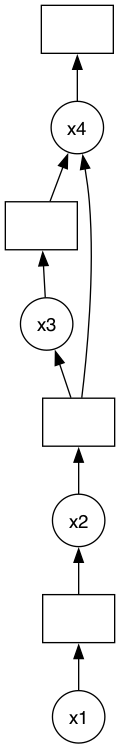

In [71]:
import dask
from dask.dot import dot_graph
from IPython.display import Image

# Определение графа задач
dask_graph = {
    'x1': (lambda: 10,),  # Задача без аргументов
    'x2': (lambda x: x + 5, 'x1'),  # Задача зависит от 'x1'
    'x3': (lambda x: x * 2, 'x2'),  # Задача зависит от 'x2'
    'x4': (lambda x, y: x + y, 'x2', 'x3')  # Задача зависит от 'x2' и 'x3'
}

result = dask.get(dask_graph, 'x4')
print("Результат:", result)

# Визуализация графа и сохранение в файл
dot_graph(dask_graph, filename='images/complex_graph')
Image(filename='images/complex_graph.png')

## Dask ETL

Dask отлично подходит для выполнения ETL (Extract, Transform, Load) задач на больших объемах данных. Dask позволяет работать с данными, которые не помещаются в память, распределяя обработку по нескольким узлам или ядрам процессора. Благодаря гибкости и масштабируемости, Dask становится мощным инструментом для выполнения сложных ETL-пайплайнов.

### Интеграция с S3 для обработки данных

In [73]:
%pip isntall s3fs
import dask.dataframe as dd

# 1. Extract: чтение данных из S3
df = dd.read_csv('s3://bucket-name/data/*.csv', storage_options={'key': 'AWS_KEY', 'secret': 'AWS_SECRET'})

# 2. Transform: агрегирование данных
aggregated = df.groupby('region').sales.sum()

# 3. Load: сохранение результата обратно в S3
aggregated.to_csv('s3://bucket-name/processed/aggregated_sales.csv', single_file=True, storage_options={'key': 'AWS_KEY', 'secret': 'AWS_SECRET'})

print("Данные успешно обработаны и загружены в S3!")

ValueError: filedescriptor out of range in select()

## Кот дня

![ragdoll](images/lazykingdom.JPG)

Это рэгдолл. Назван так благодаря характерной расслабленности при взаимодействии с человеком — их поведение напоминает тряпичную куклу (ragdoll). 

Они отличаются своим мягким и спокойным характером, что делает их одними из самых дружелюбных домашних кошек. 

К сожалению, из-за их популярности и ограниченного генофонда, порода сталкивается с проблемой бутылочного горлышка. Это значит, что недостаточное генетическое разнообразие может привести к появлению наследственных заболеваний и вырождению породы в будущем. 

Рэгдоллы известны своей долгой жизнью, которая может достигать 15–20 лет. Однако для их содержания требуется значительное внимание, так как эти кошки сильно привязаны к людям и нуждаются в общении. Они плохо переносят одиночество и требуют много времени от своих хозяев. Эта порода также относится к одной из самых дорогих, так как её разведение требует тщательного ухода и контроля за здоровьем. 

Красота, преданность и дружелюбие делают рэгдоллов идеальными питомцами, но владельцы должны быть готовы к большому количеству времени и усилий, необходимым для поддержания их здоровья и счастья.